In [1]:
#remove warning
import warnings
warnings.filterwarnings('ignore')

<h1>Import Libraries</h1>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


<h1>Load Dataset</h1>

In [3]:
df = pd.read_excel("World_Happiness.xlsx")
df.head()
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking                       1499 non-null   int64  
 1   Country                       1499 non-null   object 
 2   Regional indicator            1499 non-null   object 
 3   Happiness score               1499 non-null   float64
 4   GDP per capita                1499 non-null   float64
 5   Social support                1499 non-null   float64
 6   Healthy life expectancy       1499 non-null   int64  
 7   Freedom to make life choices  1499 non-null   float64
 8   Generosity                    1499 non-null   float64
 9   Perceptions of corruption     1499 non-null   float64
 10  Year                          1499 non-null   int64  
 11  Happiness Level               1499 non-null   object 
 12  Income Level                  1499 non-null   object 
 13  Hea

Ranking                         0
Country                         0
Regional indicator              0
Happiness score                 0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Year                            0
Happiness Level                 0
Income Level                    0
Health Level                    0
Support Strength                0
Freedom Level                   0
Generosity Level                0
Corruption Level                0
dtype: int64

<h1>Data Preprocessing</h1>

In [4]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [5]:
le = LabelEncoder()
df['Happiness_Level_Encoded'] = le.fit_transform(df['Happiness Level'])

In [6]:
features = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

<h1><b><i>HAPPINESS LEVEL CLASSIFICATION</i></b></h1>

<h1>Train-Test Split</h1>

In [7]:
X = df[features]
y = df['Happiness_Level_Encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


<h1>Logistic Regression</h1>

In [8]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)


In [9]:
lr1=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.61      0.64        49
           1       0.73      0.84      0.78       142
           2       0.63      0.62      0.62        76
           3       0.00      0.00      0.00         5
           4       0.65      0.39      0.49        28

    accuracy                           0.69       300
   macro avg       0.53      0.49      0.51       300
weighted avg       0.67      0.69      0.68       300



<h1>Random Forest</h1>

In [10]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf1=accuracy_score(y_test, rf_pred)
accuracy_score(y_test, rf_pred)

0.7433333333333333

<h1>Feature Importance</h1>

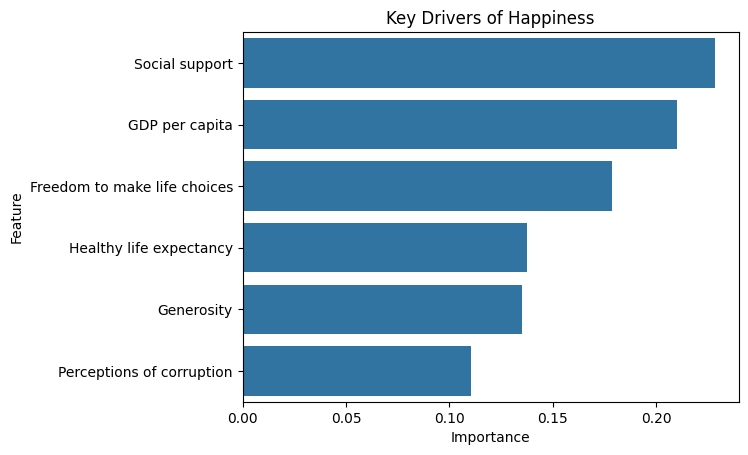

In [11]:
importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Key Drivers of Happiness")
plt.show()


<h1><b><i>HAPPINESS SCORE REGRESSION</i></b></h1>

<h1>Target</h1>

In [12]:
y_reg = df['Happiness score']

<h1>Train-Test Split</h1>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

<h1>Linear Regression</h1>

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [15]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.4502301703325645
RMSE: 0.5803322771046199
R2 Score: 0.7137316536515774


<h1>Random Forest Regression</h1>

In [16]:
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)

pred_rf = rf_reg.predict(X_test)
r2_score(y_test, pred_rf)


0.7856653503243173

<h1>HAPPINESS LEVEL – CLASSIFICATION MODEL</h1>

<h1>Define Features & Target</h1>

In [17]:
features = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

X = df[features]
y = df['Happiness_Level_Encoded']


<h1>Train–Test Split</h1>

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


<h1>Logistic Regression</h1>

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
lg_acc=accuracy_score(y_test, y_pred_log)

Accuracy: 0.6566666666666666
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        46
           1       0.72      0.85      0.78       141
           2       0.53      0.54      0.53        74
           3       0.00      0.00      0.00         7
           4       0.64      0.22      0.33        32

    accuracy                           0.66       300
   macro avg       0.51      0.45      0.46       300
weighted avg       0.64      0.66      0.63       300



<h1>Random Forest Classifier</h1>

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
rf=accuracy_score(y_test, y_pred_rf)

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        46
           1       0.82      0.84      0.83       141
           2       0.62      0.73      0.67        74
           3       1.00      0.71      0.83         7
           4       0.70      0.44      0.54        32

    accuracy                           0.75       300
   macro avg       0.78      0.69      0.73       300
weighted avg       0.75      0.75      0.75       300



<h1>Confusion Matrix</h1>

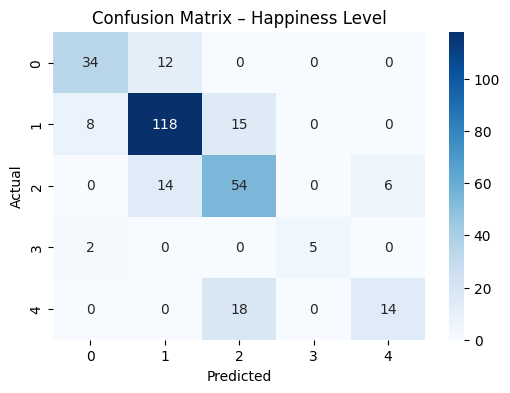

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Happiness Level")
plt.show()


<h1>Feature Importance</h1>

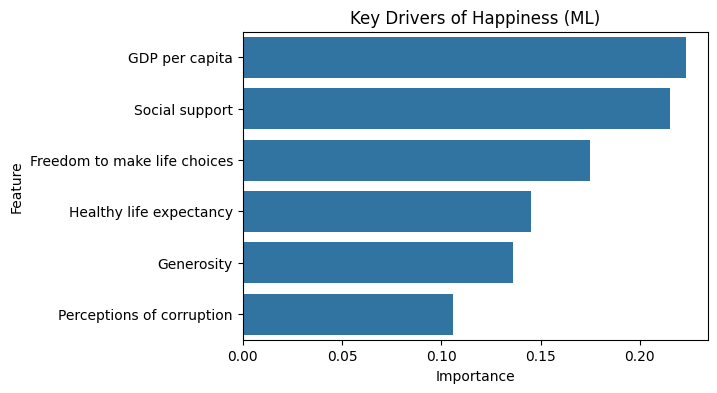

In [22]:
importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Key Drivers of Happiness (ML)")
plt.show()


<h1>HAPPINESS SCORE – REGRESSION MODEL</h1>

<h1>Define Features & Target</h1>

In [23]:
features = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

X = df[features]
y = df['Happiness score']


<h1>Train–Test Split</h1>

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


<h1>Linear Regression</h1>

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


MAE: 0.4502301703325645
RMSE: 0.5803322771046199
R² Score: 0.7137316536515774


<h1>Random Forest Regressor</h1>

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_reg1 = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf_reg1.fit(X_train, y_train)

y_pred_rf1 = rf_reg1.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_rf1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf1)))
print("R² Score:", r2_score(y_test, y_pred_rf1))


MAE: 0.37596563666666677
RMSE: 0.5010735481918334
R² Score: 0.7865860367705239


<h1>Feature Importance</h1>

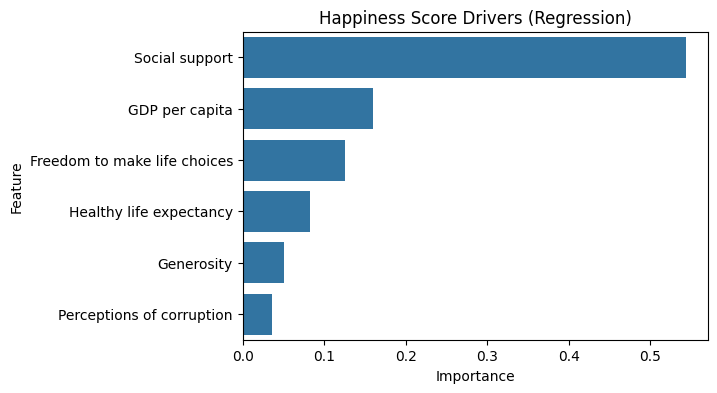

In [27]:
importance_reg = pd.DataFrame({
    'Feature': features,
    'Importance': rf_reg1.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=importance_reg)
plt.title("Happiness Score Drivers (Regression)")
plt.show()


<h1>Model Comparison</h1>

In [29]:
ac1,ac2,ac3 = (lg_acc*100),(lr1*100),(rf1*100)
results = pd.DataFrame({
    "Model": ["Logistic Regression","Linear Regression","Random Forest"],
    "Accuracy":[ac1,ac2,ac3], 
})
results

,Model,Accuracy
0,Logistic Regression,65.666667
1,Linear Regression,69.000000
2,Random Forest,74.333333
